# Solar Weather Lab: Predicting Sunspot Activity

## Introduction
Have you ever wondered how the Sun's activity influences space weather and even life on Earth? Sunspots — dark, cooler regions on the Sun’s surface - are closely tied to solar storms that can disrupt satellites, GPS, and even power grids. Understanding and predicting sunspot activity is crucial for space weather forecasting.

In this lab, you’ll experiment with sequence modeling using some of the techniques we have covered in class to predict sunspot numbers. We'll use real NASA data and train various sequence models, including Recurrent Neural Networks (RNNs), Gated Recurrent Units (GRUs), Long Short-Term Memory (LSTM) networks, and the state-of-the-art Mamba model. You will fine-tune these models and optimize hyperparameters to improve RMSE accuracy. By the end, you’ll gain hands-on experience with time series forecasting and sequence learning, all while unraveling the mysteries of our star!

## Objectives
- Fetch and preprocess real-world NASA Sunspot data.
- Apply sequence modeling techniques for time series forecasting.
- Implement and train RNN, GRU, LSTM, and Mamba models using PyTorch.
- Tune hyperparameters and optimize models for improved RMSE accuracy.
- Evaluate model performance and visualize predictions.

## Prerequisites
Before starting, ensure you have:
- Basic knowledge of Python and PyTorch.
- Familiarity with neural networks and sequence modeling (RNNs, GRUs, LSTMs, Mamba).
- Experience with data preprocessing and time series analysis.

## Dataset
We will use NASA’s **Sunspot & Solar Weather Data**, fetched from:
[NOAA Solar Cycle Sunspots JSON](https://services.swpc.noaa.gov/json/solar-cycle/sunspots.json)
This dataset includes historical sunspot counts and solar flux data, essential for understanding solar activity cycles.

---

## Lab Steps

### Preprocessing
   - Retrieve the NASA’s **Sunspot & Solar Weather Data**.  
   - Normalize the data and handle missing values (minmax scaler is provided).  
   - Convert the dataset into sequences (48 past time steps are provided)


### Implement Sequence Models

You will implement and compare the following models:

- **Simple RNN**
 - Implement a single-layer RNN to process seismic time-series data.
 - Train and evaluate performance.

- **Long Short-Term Memory (LSTM) - this is provided**
 - Implement an LSTM-based model to capture long-range dependencies.
 - Compare results with the simple RNN model.

- **Gated Recurrent Unit (GRU)**
 - Implement a GRU model and analyze its efficiency in training and generalization.


### Evaluation and insights
- **Compare Model Performance**  
   - Train all models using the same dataset split.  
   - Evaluate using RMSE.
   - Evaluate performance in terms of training time vs inference time.
   - Visualize loss curves and performance metrics.
   - Compare how different architectures handle sequence modeling.
   - Discuss challenges such as overfitting and vanishing gradients.


---

### **Deliverables**
- Notebook with code and explanations.
- Report summarizing findings and insights, include visualizations comparing model predictions.

---



  time-tag    ssn
0  1749-01   96.7
1  1749-02  104.3
2  1749-03  116.7
3  1749-04   92.8
4  1749-05  141.7


/var/folders/ql/8ckgg48s6mzfjtj28chdd1tw0000gn/T/ipykernel_19258/16940686.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[df_train.columns] = scaler.fit_transform(df_train[df_train.columns])
/var/folders/ql/8ckgg48s6mzfjtj28chdd1tw0000gn/T/ipykernel_19258/16940686.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[df_test.columns] = scaler.transform(df_test[df_test.columns])


Epoch 1/10, Loss: 0.028068
Epoch 2/10, Loss: 0.008825
Epoch 3/10, Loss: 0.005952
Epoch 4/10, Loss: 0.005589
Epoch 5/10, Loss: 0.005501
Epoch 6/10, Loss: 0.005252
Epoch 7/10, Loss: 0.005276
Epoch 8/10, Loss: 0.004997
Epoch 9/10, Loss: 0.005044
Epoch 10/10, Loss: 0.004996


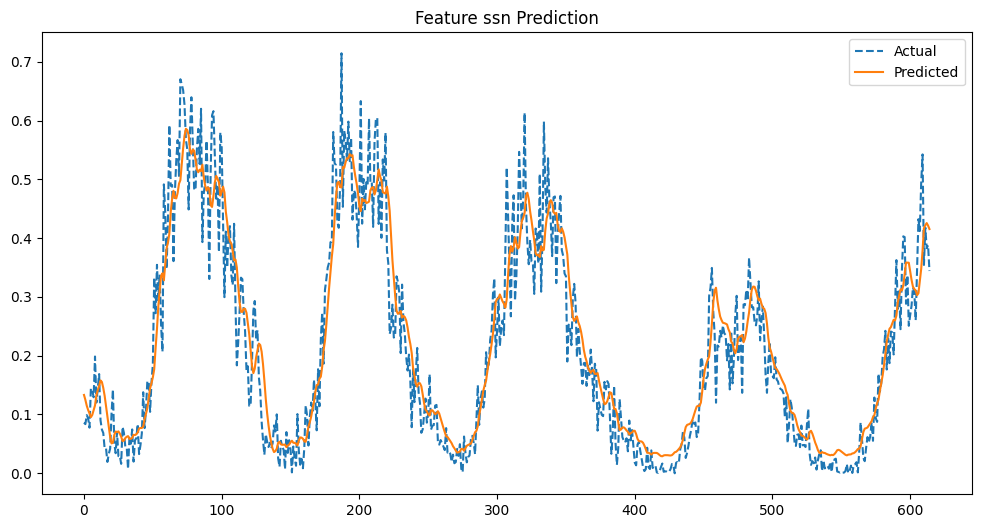

Epoch 1/10, Loss: 0.015294
Epoch 2/10, Loss: 0.006138
Epoch 3/10, Loss: 0.005718
Epoch 4/10, Loss: 0.005716
Epoch 5/10, Loss: 0.005577
Epoch 6/10, Loss: 0.005272
Epoch 7/10, Loss: 0.004930
Epoch 8/10, Loss: 0.004930
Epoch 9/10, Loss: 0.004793
Epoch 10/10, Loss: 0.004797


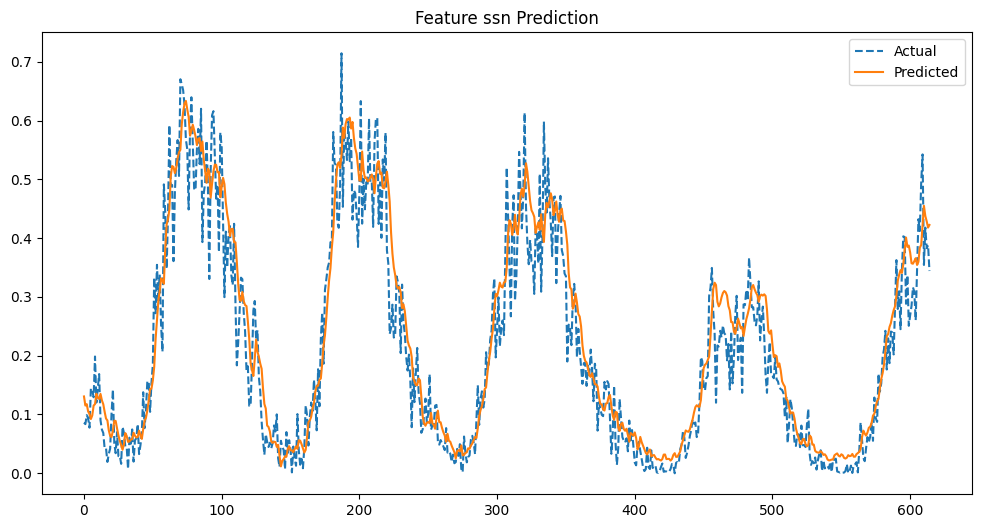

Epoch 1/10, Loss: 0.028653
Epoch 2/10, Loss: 0.007077
Epoch 3/10, Loss: 0.005292
Epoch 4/10, Loss: 0.005067
Epoch 5/10, Loss: 0.004934
Epoch 6/10, Loss: 0.004969
Epoch 7/10, Loss: 0.004790
Epoch 8/10, Loss: 0.004637
Epoch 9/10, Loss: 0.004597
Epoch 10/10, Loss: 0.004583


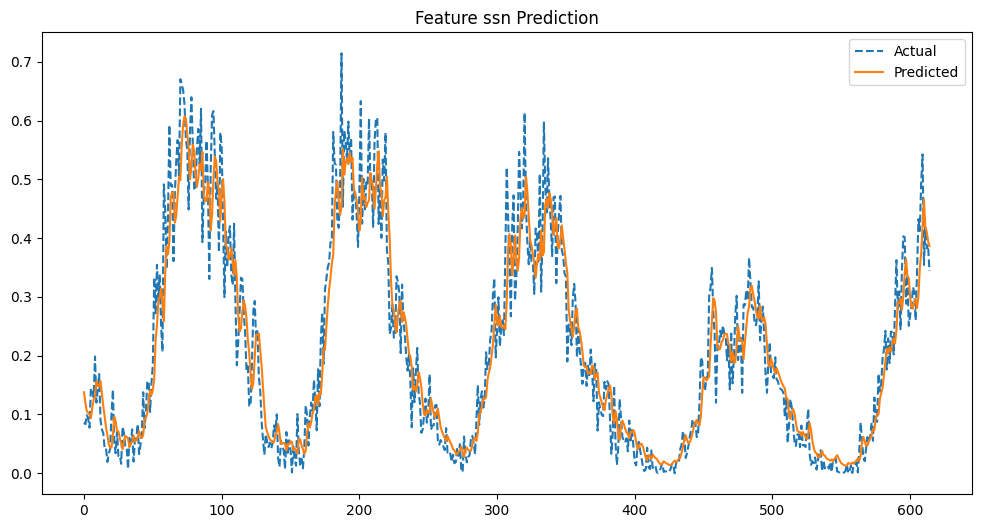

Epoch 1/10, Loss: 0.272681
Epoch 2/10, Loss: 0.011022
Epoch 3/10, Loss: 0.006355
Epoch 4/10, Loss: 0.005948
Epoch 5/10, Loss: 0.005831
Epoch 6/10, Loss: 0.005665
Epoch 7/10, Loss: 0.005519
Epoch 8/10, Loss: 0.005480
Epoch 9/10, Loss: 0.005426
Epoch 10/10, Loss: 0.005530


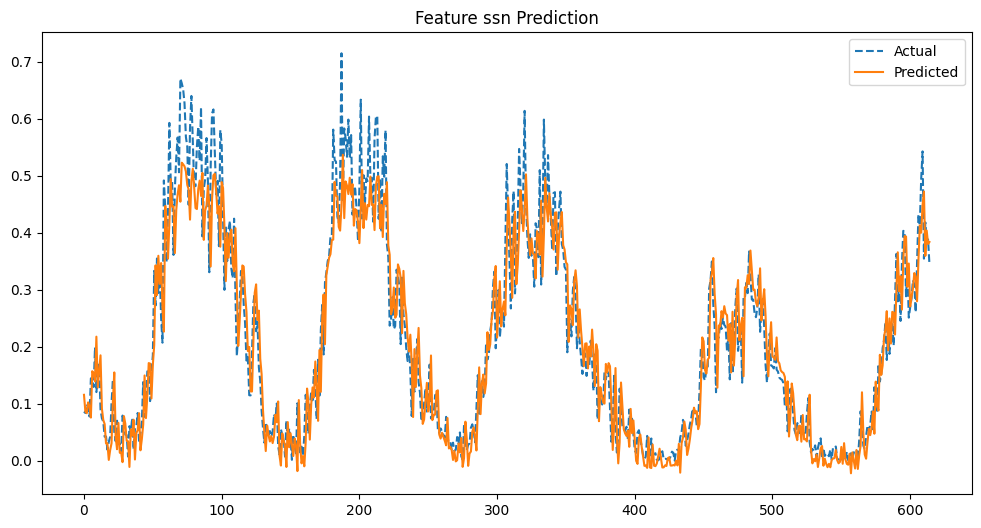

In [1]:
import pandas as pd
import numpy as np
import requests
import io
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
import torch.nn.init as init
from model import Mamba, ModelArgs





class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=2):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        return self.fc(lstm_out[:, -1, :])

class simpleRNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=2):
        super(simpleRNN, self).__init__()
        self.hid_s = hidden_dim
        self.num_lay = num_layers
        
        self.rnn= nn.RNN(input_size=input_dim, hidden_size=hidden_dim,num_layers=num_layers, batch_first=True,dropout=.2)
        self.fc = nn.Linear(hidden_dim,output_dim)
        
        self.init_weights()
    # using the orthagonal initlization shown in the walkthrough 
    def init_weights(self):
        for name, param in self.rnn.named_parameters():
            if "weight_hh" in name:
                init.orthogonal_(param)
        
    def forward(self, x):
        out , hidden = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out
    
    def init_hidden(self, batch_size):
        return torch.zeros(self.num_lay, batch_size, self.hid_s)
        
class gRNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=2):
        super(gRNN, self).__init__()
        self.hid_s = hidden_dim
        self.num_lay = num_layers
        self.grNN = nn.GRU(input_size=input_dim,hidden_size=hidden_dim,num_layers=2,batch_first=True,dropout=.2)
        self.fc = nn.Linear(hidden_dim,output_dim)
        self.init_weights()
        
    def init_weights(self):
        for name, param in self.grNN.named_parameters():
            if "weight_hh" in name:
                init.orthogonal_(param)
        
    def forward(self, x):
        out , hidden = self.grNN(x)
        out = self.fc(out[:, -1, :])
        return out
    
    def init_hidden(self, batch_size):
        return torch.zeros(self.num_lay, batch_size, self.hid_s)
        

    

                
        
#Sequence Data Preparation
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

#Training Loop
def train_model(model, train_loader, epochs=10):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.6f}")


# Testing loop
def evaluate(model, test_loader):
    model.eval()
    predictions, actuals = [], []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            preds = model(X_batch).numpy()
            predictions.extend(preds)
            actuals.extend(y_batch.numpy())
    return np.array(predictions), np.array(actuals)

def plot_results(y_true, y_pred, feature_idx=0):
    plt.figure(figsize=(12, 6))
    plt.plot(y_true[:, feature_idx], label="Actual", linestyle="dashed")
    plt.plot(y_pred[:, feature_idx], label="Predicted")
    plt.legend()
    plt.title(f"Feature {df.columns[feature_idx]} Prediction")
    plt.show()


url = "https://services.swpc.noaa.gov/json/solar-cycle/sunspots.json"
response = requests.get(url)

if response.status_code == 200:
    raw_data = response.json()
else:
    print(f"Error {response.status_code}: Unable to fetch data")
    raw_data = []

# Preprocessing
df = pd.DataFrame(raw_data)
print(df.head())
df['time-tag'] = pd.to_datetime(df['time-tag'])
df.set_index('time-tag', inplace=True)
df = df[['ssn']]  # Selecting relevant features


# Split data into training and testing sets
train_size = int(len(df) * 0.8)
df_train = df.iloc[:train_size]
df_test = df.iloc[train_size:]

# Normalize data
scaler = MinMaxScaler()
df_train[df_train.columns] = scaler.fit_transform(df_train[df_train.columns])
df_test[df_test.columns] = scaler.transform(df_test[df_test.columns])


sequence_length = 48  # Using past 48 timesteps
data_train_array = df_train.values
data_test_array = df_test.values
X_train, y_train = create_sequences(data_train_array, sequence_length)
X_test, y_test = create_sequences(data_test_array, sequence_length)

X_train, y_train = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32)
X_test, y_test = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)

train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=64, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=64, shuffle=False)


args = ModelArgs(
    d_model=64,    
    n_layer=1,        
    vocab_size=None,  
    d_state=16,     
    expand=2,         
    dt_rank='auto',   
    d_conv=4,        
    pad_vocab_size_multiple=8,
    conv_bias=True,
    bias=False,
    scan_mode='cumsum' 
)

model1 = LSTMModel(input_dim=df.shape[1], hidden_dim=64, output_dim=df.shape[1])
model2 = simpleRNN(input_dim=df.shape[1], hidden_dim=64, output_dim=df.shape[1])
model3 = gRNN(input_dim=df.shape[1], hidden_dim=64, output_dim=df.shape[1])
model4 = Mamba(args)

models = [model1,model2,model3,model4]
for model in models:
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.MSELoss()

    train_model(model, train_loader, epochs=10)

    y_pred, y_true = evaluate(model, test_loader)

    plot_results(y_true, y_pred, feature_idx=0)

